# Student Loan Risk with Deep Learning

In [250]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path
import numpy as np
import os
import pickle

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [251]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [252]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [253]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

In [254]:
loans_df.shape

(1599, 12)

In [255]:
loans_df.describe()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


                        payment_history  location_parameter  \
payment_history                1.000000           -0.256131   
location_parameter            -0.256131            1.000000   
stem_degree_score              0.671703           -0.552496   
gpa_ranking                    0.114777            0.001918   
alumni_success                 0.093705            0.061298   
study_major_code              -0.153794           -0.010504   
time_to_completion            -0.113181            0.076470   
finance_workshop_score         0.668047            0.022026   
cohort_ranking                -0.682978            0.234937   
total_loan_score               0.183006           -0.260987   
financial_aid_score           -0.061668           -0.202288   
credit_ranking                 0.095093           -0.321441   

                        stem_degree_score  gpa_ranking  alumni_success  \
payment_history                  0.671703     0.114777        0.093705   
location_parameter              

<Axes: >

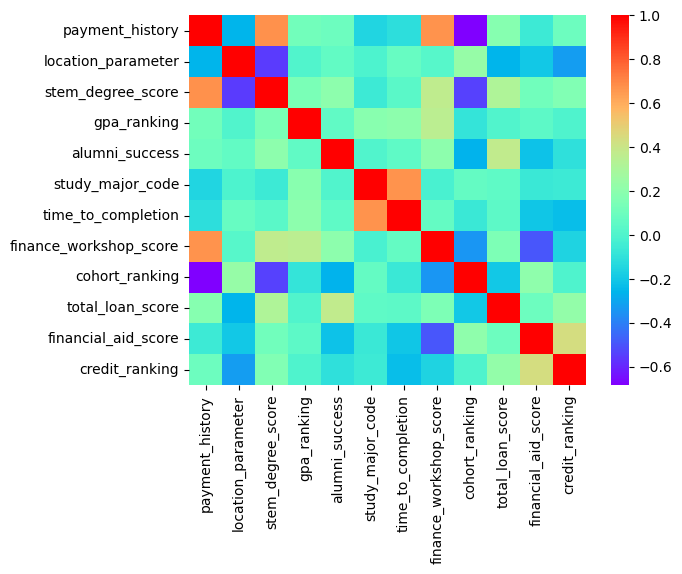

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

print(loans_df.corr())
sns.heatmap(loans_df.corr(), cmap="rainbow")




### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [257]:
loans_df.columns

Index(['payment_history', 'location_parameter', 'stem_degree_score',
       'gpa_ranking', 'alumni_success', 'study_major_code',
       'time_to_completion', 'finance_workshop_score', 'cohort_ranking',
       'total_loan_score', 'financial_aid_score', 'credit_ranking'],
      dtype='object')

In [279]:
#Likely useful feature columns
#features = ['location_parameter', 'stem_degree_score', 'finance_workshop_score', 'cohort_ranking', 'credit_ranking']

features = [
    'payment_history', 
    'stem_degree_score',
    'gpa_ranking', 
    'alumni_success', 
    'study_major_code',
    'time_to_completion', 
    'finance_workshop_score',
    'total_loan_score',
    'financial_aid_score',
    'credit_ranking',
    'cohort_ranking']

'''
# Accuracy: Wavg0.75
features = [
    'payment_history', 'stem_degree_score',
       'gpa_ranking', 'alumni_success', 'study_major_code',
       'time_to_completion', 'finance_workshop_score',
       'total_loan_score', 'financial_aid_score', 'credit_ranking', 'cohort_ranking']
'''

"\n# Accuracy: Wavg0.75\nfeatures = [\n    'payment_history', 'stem_degree_score',\n       'gpa_ranking', 'alumni_success', 'study_major_code',\n       'time_to_completion', 'finance_workshop_score',\n       'total_loan_score', 'financial_aid_score', 'credit_ranking', 'cohort_ranking']\n"

In [280]:
TARGET_COL = "credit_ranking"

In [281]:
# Define the target set y using the credit_ranking column
y = loans_df[TARGET_COL]

# Display a sample of y
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: credit_ranking, Length: 1599, dtype: int64

In [282]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df[features].drop(columns=TARGET_COL)

# Review the features DataFrame
X.head()

,payment_history,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,total_loan_score,financial_aid_score,cohort_ranking
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,3.51
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,3.20
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,3.26
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,3.16
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,3.51


### Step 3: Split the features and target sets into training and testing datasets.


In [283]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [284]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_train_scaled = scaler.fit_transform(X_train)


# Fit the scaler to the features test dataset
X_test_scaled = scaler.transform(X_test)

In [285]:
X_train_scaled[0]

array([-0.56794375, -0.19241296, -0.17192598, -0.45737585,  1.86853316,
        0.7479316 , -0.45120802, -0.22553894, -0.31915735,  0.73249574])

In [286]:
X_test_scaled[0]

array([ 0.26985713,  1.87373569, -0.24714555,  0.12377763, -0.64737885,
       -0.11645477,  0.97047758,  0.01130905,  0.05358797,  1.43159743])

---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [287]:
# Define the the number of inputs (features) to the model
num_inputs = len(X_train.columns)

# Review the number of features
num_inputs

10

In [288]:
# Define the number of hidden nodes for the first hidden layer
num_hidden_nodes_layer_1 = int(num_inputs * 2)

# Define the number of hidden nodes for the second hidden layer
num_hidden_nodes_layer_2 = int(num_hidden_nodes_layer_1 *.5)

# Define the number of neurons in the output layer
num_output_neurons = 1

In [289]:
# Create the Sequential model instance
model = Sequential()
# Add the first hidden layer
model.add(Dense(units=num_hidden_nodes_layer_1, activation = "relu", input_dim = num_inputs))

# Add the second hidden layer
model.add(Dense(units=num_hidden_nodes_layer_2, activation = "relu", input_dim = num_hidden_nodes_layer_1))

# Add the output layer to the model specifying the number of output neurons and activation function
model.add(Dense(units = num_output_neurons, activation="sigmoid"))

In [290]:
# Display the Sequential model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 20)                220       
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [291]:
# Compile the Sequential model
model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])


In [292]:
# Fit the model using 50 epochs and the training data
epoch_num = 100
fit_model = model.fit(X_train_scaled, y_train, epochs=epoch_num)

Epoch 1/100
38/38 [==============================] - 0s 399us/step - loss: 0.7992 - accuracy: 0.4170
Epoch 2/100
38/38 [==============================] - 0s 297us/step - loss: 0.7208 - accuracy: 0.5038
Epoch 3/100
38/38 [==============================] - 0s 283us/step - loss: 0.6788 - accuracy: 0.5822
Epoch 4/100
38/38 [==============================] - 0s 281us/step - loss: 0.6476 - accuracy: 0.6539
Epoch 5/100
38/38 [==============================] - 0s 275us/step - loss: 0.6188 - accuracy: 0.6997
Epoch 6/100
38/38 [==============================] - 0s 265us/step - loss: 0.5863 - accuracy: 0.7281
Epoch 7/100
38/38 [==============================] - 0s 278us/step - loss: 0.5581 - accuracy: 0.7248
Epoch 8/100
38/38 [==============================] - 0s 270us/step - loss: 0.5422 - accuracy: 0.7331
Epoch 9/100
38/38 [==============================] - 0s 270us/step - loss: 0.5286 - accuracy: 0.7440
Epoch 10/100
38/38 [==============================] - 0s 269us/step - loss: 0.5204 - accura

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [293]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose =2)

# Display the model loss and accuracy results
print(f"""
      Model Loss: {model_loss}
      Accuracy: {model_accuracy}""")

13/13 - 0s - loss: 0.5761 - accuracy: 0.7525 - 47ms/epoch - 4ms/step

      Model Loss: 0.5760796070098877
      Accuracy: 0.7524999976158142


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [294]:
# Set the model's file path
ROOT_DIR =  "./"
if os.environ.get('COLAB_BACKEND_VERSION') is not None:
  print("You ARE running in Google Colab. A drive will be mounted") 
  from google.colab import drive
  ROOT_DIR = '/content/drive/'
  drive.mount = ROOT_DIR
    
    
    

In [295]:

model_path = ROOT_DIR+"student_loans.keras"

# Export your model to a keras file

model.save(model_path)

---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [296]:
# Set the model's file path


# Load the model to a new object
model2 = tf.keras.models.load_model(model_path)
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 20)                220       
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [297]:
# Make predictions with the test data
model2_predictions = model2.predict(X_test_scaled)

# Display a sample of the predictions
model2_predictions

13/13 [==============================] - 0s 306us/step


array([[0.05191607],
       [0.40220687],
       [0.6369194 ],
       [0.7734896 ],
       [0.9282573 ],
       [0.8637334 ],
       [0.9728896 ],
       [0.04922204],
       [0.62752724],
       [0.2622888 ],
       [0.9104779 ],
       [0.07275641],
       [0.3136307 ],
       [0.9486317 ],
       [0.6691818 ],
       [0.4716683 ],
       [0.93743235],
       [0.4401054 ],
       [0.45489687],
       [0.35408416],
       [0.5243397 ],
       [0.9153751 ],
       [0.222039  ],
       [0.93704796],
       [0.21788374],
       [0.97097373],
       [0.705572  ],
       [0.57888913],
       [0.29389182],
       [0.91430587],
       [0.79658735],
       [0.9889577 ],
       [0.17634064],
       [0.969602  ],
       [0.05963914],
       [0.3532159 ],
       [0.1269865 ],
       [0.35394555],
       [0.95532423],
       [0.06085252],
       [0.9839483 ],
       [0.04836491],
       [0.13883561],
       [0.9643846 ],
       [0.08158509],
       [0.61718893],
       [0.16249141],
       [0.164

In [298]:
# Save the predictions to a DataFrame and round the predictions to binary results
rounded_predictions = np.round(model2_predictions)
model2_predictions_df = pd.DataFrame(rounded_predictions, columns=[TARGET_COL])
# model2_predictions_df = np.round(model2_predictions_df)
model2_predictions_df.head()

,credit_ranking
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


### Step 4: Display a classification report with the y test data and predictions

In [299]:
# Print the classification report with the y test data and predictions
print(classification_report(y_true=y_test, y_pred=rounded_predictions))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       188
           1       0.77      0.76      0.76       212

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**
I think it would be helpful to collect the below when building the recommendation system
| Data | Rationale|
| -- | -- |
| Credit score | To guage how the customer handles their current and historic financial obligations. |
| Current debt to income ratio | To identify how much overall debt the customer is responsible for |
| Percentage of overall debt that is due to the loan to be refinanced | This is could be factored into the risk analysis. The company may feel more or less comfortable depending on how much of the debt they are taking on. |
| Repayment history for the loan being refinanced | To determine how well the customer has handled this particualr debt obligation. |
| Customer location* | Certain locations are more likely to have more job opportunties than others |
| STEM degree score* | People with STEM degress tend to have a higher earning potential than people with non-STEM degrees |
| Finance_workshop_score* | I'm guessing that this was some sort of evaluation of financial knowledge but I could be wrong |
| Cohort Ranking* | Those with higher a ranking, which is somewhat related to GPA, tend to be offered more work opportunities earlier in their careers. | 
| Risk ranking predictions from a model similar to the one defined in this exercise. |  To help to predict repayment | 
 *= fields that had higher correlation matrix scores

**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**

Collaborative filtering because the recommendation would be based on information from other similar users.

**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**

1. A customer may not have enough credit history information to accurately predict future repayment behavior. This could lead to an opportunity loss due to denying loans to customers whose near future circumstances make them better able to repay the loan than they were in the past. This could be mitigated, from the loan company perspective, by offering a higher interest rate to the future customers with insufficient credit history data.
1. 